# Loading Dependencies

In [48]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from datetime import datetime

## Reading and preparing Data

### data is loaded from <b> Olivetti face data </b>

In [127]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
np.random.shuffle(faces)

split=0.9
k=int(split*faces.shape[0])
train_faces=faces[:k,:]
test_faces=faces[k:,:]
print(train_faces.shape)
print(test_faces.shape)

(360, 4096)
(40, 4096)


In [128]:
images=np.asarray([np.reshape(image, (64,64)) for image in train_faces])
print(images.shape)

(360, 64, 64)


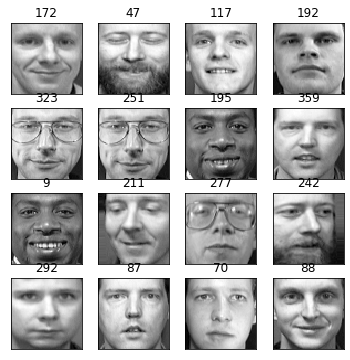

In [130]:
fig= plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')
#ax.axes.xaxis.set_visible(false)
j=1
np.random.seed(0)
for i in np.random.choice(images.shape[0],16):
    ax=fig.add_subplot(4,4,j, xticks=[],yticks=[])
    ax.set_title(i)
    ax.imshow(images[i],cmap='gray')
    j=j+1

plt.show()

# PCA

####  Finding mean face 

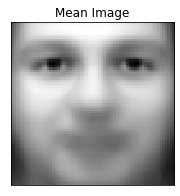

In [131]:
n=images.shape[0]
mean_img=np.sum(images,axis=0)/n
fig=plt.figure(figsize=(3,3))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(xticks=[],yticks=[])
ax.imshow(mean_img,cmap='gray')
ax.set_title('Mean Image')
plt.show()

### Subtract mean image from each figure
##### this shifts the data vectors to origin

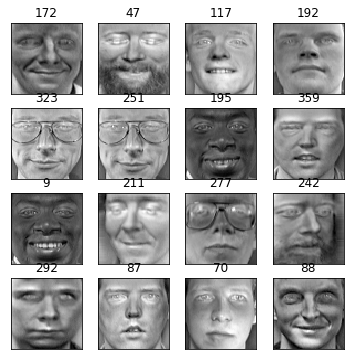

In [132]:
centered_images = np.asarray([(im - mean_img ) for im in images])
#print(centered_images.shape)
## subtracted images are 

j=1
np.random.seed(0)
fig= plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')
for i in np.random.choice(400,16):
    ax=fig.add_subplot(4,4,j, xticks=[],yticks=[])
    ax.set_title(i)
    ax.imshow(centered_images[i],cmap='gray')
    j=j+1

plt.show()

## Covarience Matrix
Now we have the images data shifted to origin
here we will find co-varience matrix for PCA

In [133]:
#onvert images back to flatenned vectors

vec_images=np.asarray([np.reshape(img,(img.shape[0]*img.shape[1])) for img in centered_images])
#print(vec_images.shape)

m=vec_images.shape[0]
d=vec_images.shape[1]

# m is total no of images
#d is the dimension of flatenned image
print('no of images : :', m)
cov_matrix=np.zeros(d*d)
cov_matrix=np.reshape(cov_matrix,(d,d))
for i in range(m):
    cov_matrix+=(np.outer(vec_images[i],vec_images[i]))
#cov_matrix=np.outer(vec_images[0],vec_images[0])
cov_matrix=cov_matrix/m
print(cov_matrix.shape)

no of images : : 360
(4096, 4096)


Now we will find and display the varience image.

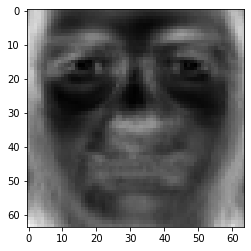

In [134]:
img_dim=int(np.sqrt(d))
sigma_image=np.diagonal(cov_matrix).reshape(img_dim,img_dim)
plt.imshow(sigma_image,cmap='gray')
plt.show()

## Eigen Values and Eigen Faeces
<ul>
    <li>Next we will find eigen vales and eigen faces  </li>
    <li>Sort eigen vales in descending order </li>
    <li>  first k eigenvectors corresponding to the first eigen<br> values will be taken as eigen faces</li>
</ul>




In [135]:
lm, eig_vec_col = np.linalg.eig(cov_matrix)

In [136]:
print('shape of eigen_values : ', lm.shape)
print('shape of eigen_faces : ', eig_vec.shape)
#print(lm)
eig_vec=np.transpose(eig_vec_col)
sort_index=np.argsort(lm)
sort_index=sort_index[::-1]
lm=lm[sort_index]
eig_vec=eig_vec[sort_index,:]
#
#print(np.argmax(lm))

shape of eigen_values :  (4096,)
shape of eigen_faces :  (4096, 4096)


Sorting the eigen values to get top order eigen-faces

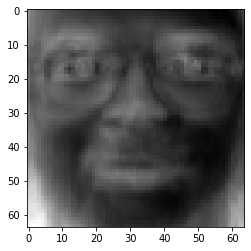

In [137]:

plt.imshow(np.reshape(eig_vec[0],(64,64)), cmap='gray')
plt.show()

<hr>
Here we have got d eigen values and d eigen vectors <br>
correspoding to dxd co-varience matrix.<br>
<span style="color:red">will all the eigen vectors be unique, if yes why</span><br>
Hence now, we have calculated eigenvalues and wigen faces <br>
Now we will plot some of the eigenfaces
<hr>

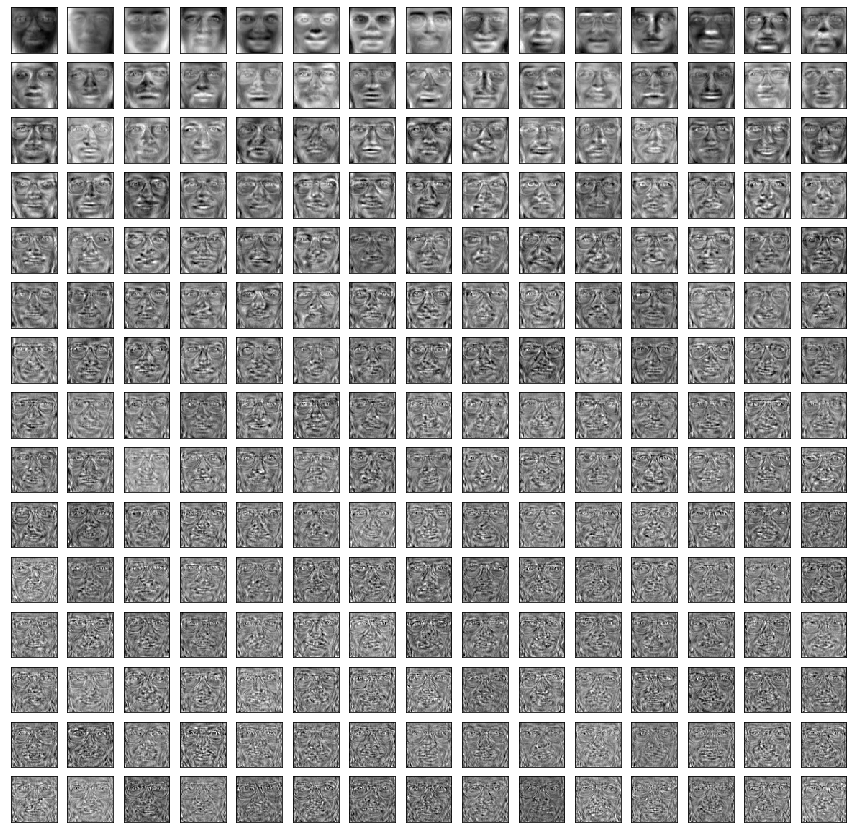

In [138]:
j=1
np.random.seed(0)
fig= plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
for i in range(15*15):
    ax=fig.add_subplot(15,15,j, xticks=[],yticks=[])
    #ax.set_title(i)
    ax.imshow(np.reshape(eig_faces[i],(64,64)),cmap='gray')
    j=j+1

plt.show()

### Getting Coefficients
Now we try to get the coefficients for a given image corresponding <br>
corresponding to different eigen faces

In [156]:
#img passed to this function has to be 
# a flatenned image 
# 1D numpy array
def get_img_cf(img):
    c_img=[]
    no_of_eig_faces=1000
    eig_faces=eig_vec[0:no_of_eig_faces,:]
    #print(eig_faces.shape)
    for i in range(no_of_eig_faces):
        c_img.append(np.dot(img,eig_faces[i]))
    c_img=np.asarray(c_img)
    return(c_img)
#print(c_img)

<hr>Follow, we try to regenerate the image from the given eigen faces<hr>

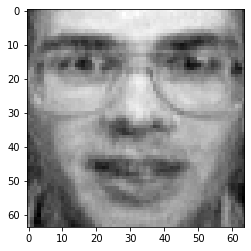

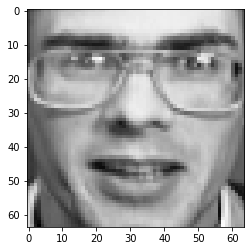

In [157]:
c_img=get_img_cf(test_faces[9])
recon_img=np.zeros(eig_faces.shape[1])
for i in range(eig_faces.shape[0]):
    recon_img+=c_img[i]*eig_faces[i]
recon_img=recon_img+mean_img.reshape(1,64*64)
plt.imshow(recon_img.reshape(64,64), cmap='gray')
plt.show()
plt.imshow(test_faces[9].reshape(64,64), cmap='gray')
plt.show()

## Calculating residuals
Now with given number of eigenfaces we are able to reconstruct the <br> 
given image, so here we wil test how good our algorihm is working to <br>
project dxd dimensional image to a lower imensional space <br>
we will now subtract the given imaeges and then compare the difference <br>
we will plot the difference image also <br> Jst for some fun

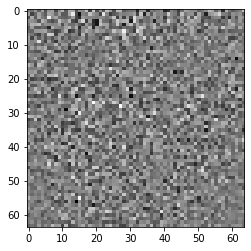

In [147]:
residual_img=np.reshape(recon_img,(64,64))-images[0]
plt.imshow(residual_img,cmap='gray')


In [151]:
test_faces[0].shape

(4096,)